<img src="images/harry_potter_banner.jpg" alt="brain" width=600>

# <span style='background :white' >    <span style='color:navy'><u> Harry Potter Contents Page</u> </span>     </span>
_Click on relevant item for navigation_

- [Data Preparation](#data_prep)
    - [Reading Harry Potter Network Data File ](#read_hp_data)
    - [Restricting Data to Hogwarts Students only](#hogwarts)


---
- [C Community Analysis](#community_analysis)
    - [C1. Plotting simple graph](#plot_simple)
        - [C1.1 Plotting simple graph—full harrypotter dataset](#plot_simple_df_full) 
        - [C1.2 Plotting simple graph—hogwarts dataset](#plot_simple_df_hogwarts)         
    - [C2. Modularity-based Agglomerative algorithm](#modularity_based)
        - [C2.1 Modularity-based algorithm—full harrypotter dataset](#modularity_df_full)
        - [C2.2 Modularity-based algorithm—hogwarts dataset](#modularity_df_hogwarts)
    - [C3. Centrality-based divisive algorithm](#centrality_based)
        - [C3.1 Girvan_newman—full harrypotter dataset](#centrality_df_full)
        - [C3.2 Girvan_newman—hogwarts dataset](#centrality_df_hogwarts)

    - [C4. Label Propagation algorithm](#label_propagation)
        - [C4.1 Label Propagation—full harrypotter dataset](#labelpro_df_full)
        - [C4.2 Label Propagation—hogwarts dataset](#labelpro_df_hogwarts)

    


---
- [꾸미기 필수](#beginner)
    - [Headings(헤딩)](#headings)
        - [Markdown method](#headings_markdown)
        - [HTML method](#headings_html)
    - [Line breaks(줄바꾸기)](#linebreaks)
        - [Markdown method](#linebreaks_markdown)
        - [HTML method](#linebreaks_html)

In [2]:
import networkx as nx
import pandas as pd
import numpy as np 
import plotly.graph_objects as go
import matplotlib.pyplot as plt

# <span style='background :white' >   <span style='color:darkblue'> <u> Data Preparation </span></span> <a id='data_prep'>

## <span style='background :white' >    <span style='color:darkblue'> Reading Harry Potter Network Data File </span>     </span> <a id='read_hp_data'>

In [3]:

# df_raw= pd.read_excel('cleaned_data.xlsx')

# Reading the Excel File
df_raw = pd.read_excel(r'cleaned_data.xlsx', sheet_name='dialogue')

# Shortlisting only necesasry columns
df = df_raw[[ 'Node_X', 'Node_Y']]

# to drop the rows where Node X = Node Y since we are not interested in self-loop
df = df[df['Node_X'] != df['Node_Y']]


# to drop the rows with empty Node_Y input
df= df.dropna()

In [4]:
df.shape

(6571, 2)

In [5]:
# If we use weighted data,
df_raw = pd.read_excel(r'cleaned_data.xlsx', sheet_name='graph_all_movie')


# Shortlisting only necesasry columns
df = df_raw[[ 'Node_X', 'Node_Y', 'weight']]


# to drop the rows where Node X = Node Y since we are not interested in self-loop
df = df[df['Node_X'] != df['Node_Y']]

# to drop the rows with empty Node_Y input
df= df.dropna()


## <span style='background :white' >    <span style='color:darkblue'> Restricting Data to Hogwarts Students only </span>     </span> <a id='hogwarts'>

<img src="images/hogwarts.jpg" alt="brain" width=200>

<div class="alert alert-block alert-info">
<b><u>List of students from Hogwarts</u></b> 
    
- Let us restrict the list of nodes X and Y to students in Hogwarts
- We want to test the accuracy of community algorithm in categorizing students into correct houses.
    - For example, Harry Potter should be correctly be under Gryffindor

https://harrypotter.neoseeker.com/wiki/List_of_students_that_go_to_Hogwarts

In [6]:
hogwarts_students = ['Lucius Malfoy','Tom Riddle','Percy Weasley','Bill Weasley','Charlie Weasley','Fred Weasley','George Weasley','Aberforth Dumbledore'
,'Albus Dumbledore','Rubeus Hagrid','Oliver Wood','Marcus Flint','Cedric Diggory','Angelina Johnson','Molly Weasley','Arthur Weasley'
,'James Potter','Lily Potter','Severus Snape','Olive Hornby','Moaning Myrtle','Bertha Jorkins','Sirius Black','Peter Pettigrew'
,'Minerva McGonagall','Remus Lupin','Lee Jordan','Alicia Spinnet','Patricia Stimpson','Madeline Cyr','Kenneth Towler','Filius Flitwick'
,'Nymphadora Tonks','Horace Slughorn','Phineas Nigellus Black','Regulus Black','Bellatrix Lestrange','Narcissa Malfoy','Evan Rosier','Rodolphus Lestrange'
,'Rabastan Lestrange','Miles Bletchley','Harry Potter','Ron Weasley','Hermione Granger','Colin Creevey','Seamus Finnigan','Hannah Abbott'
,'Pansy Parkinson','Zacharias Smith','Blaise Zabini','Draco Malfoy','Dean Thomas','Millicent Bulstrode','Terry Boot'
,'Ernie Macmillan','Vincent Crabbe','Gregory Goyle','Lavender Brown','Katie Bell','Parvati Patil','Dennis Creevey','Eloise Midgen'
,'Ritchie Coote','Jack Sloper','Victoria Frobisher','Geoffrey Hooper','Andrew Kirke','Demelza Robins','Cormac McLaggen','Neville Longbottom'
,'Ginny Weasley','Romilda Vane','Natalie McDonald','Jimmy Peakes','Euan Abercrombie','Mary MacDonald','Penelope Clearwater','Roger Davies'
,'Eddie Carmichael','Cho Chang','Marietta Edgecombe','Mandy Brocklehurst','Michael Corner','Stephen Cornfoot','Kevin Entwhistle','Anthony Goldstein'
,'Su Li','Morag McDougal','Padma Patil','Lisa Turpin','Luna Lovegood','Orla Quirke','Stewart Ackerley'
,'Susan Bones','Eleanor Branstone','Owen Cauldwell','Justin Finch-Fletchley','Wayne Hopkins','Megan Jones','Laura Madley','Kevin Whitby','Rose Zeller'
,'Terence Higgs','Adrian Pucey','Tracey Davis','Lilian Moon','Daphne Greengrass','Theodore Nott','Astoria Greengrass'
,'Malcolm Baddock''Graham Pritchard']


In [7]:
print('No of Hogwarts students in the book : ', len(hogwarts_students))

No of Hogwarts students in the book :  111


In [8]:
# Shorlisting the dataframe to only conversations between Hogwarts Students
df_hogwarts = df[df['Node_X'].isin(hogwarts_students)&df['Node_Y'].isin(hogwarts_students)  ]

In [9]:
df_hogwarts = df_hogwarts.reset_index(drop=True)

In [10]:
df_hogwarts.shape

(346, 3)

# <span style='background :white' >   <span style='color:darkblue'> <u> C. Harry Potter Community Analysis </span></span> <a id='community_analysis'>

## <span style='background :white' >   <span style='color:darkblue'> <u> C1. Plotting Simple Graph</span></span> <a id='plot_simple'>

<div class="alert alert-block alert-info">
<b><u>Approach</u></b> 
    
- We will demonstrate how to find communitites in a network using the modularity-based and centrality-based algorithms covered in the lecture. Let us first construct and visualise a toy graph as our example.

### <span style='background :white' >   <span style='color:darkblue'> <u> C1.1 Plotting Simple Graph—full harrypotter dataset</span></span> <a id='plot_simple_df_full'>

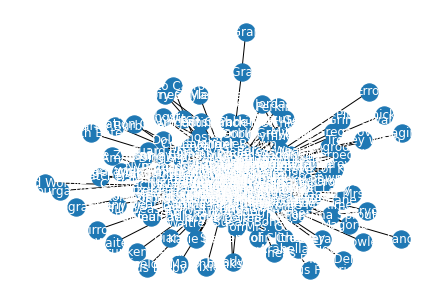

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

g_harrypotter = nx.Graph()

for index, val in enumerate(df['Node_X']):
#     print(index, val, ';', df['Node Y'][index])
    if val == df['Node_Y'][index]:  # Removing talking to self conversations
        continue
#         print(val, df['Node Y'][index])
        
    g_harrypotter.add_edge(val, df['Node_Y'][index], weight=df['weight'][index])
    


    
    

nx.draw(g_harrypotter, with_labels=True, font_color='white')
plt.show()

### <span style='background :white' >   <span style='color:darkblue'> <u> C1.2 Plotting Simple Graph—Hogwarts dataset</span></span> <a id='plot_simple_df_hogwarts'>

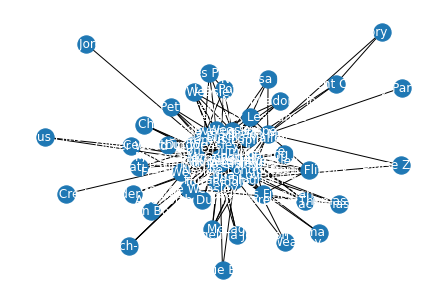

In [12]:
import networkx as nx
import matplotlib.pyplot as plt

g_hogwarts = nx.Graph()

for index, val in enumerate(df_hogwarts['Node_X']):
#     print(index,val, df_hogwarts['Node_Y'][index] )
#     print(index, val, ';', df_hogwarts['Node Y'][index])
    if val == df_hogwarts['Node_Y'][index]:  # Removing talking to self conversations
        continue
#         print(val, df_hogwarts['Node Y'][index])

    g_hogwarts.add_edge(val, df_hogwarts['Node_Y'][index], weight=df_hogwarts['weight'][index])

nx.draw(g_hogwarts, with_labels=True, font_color='white')
plt.show()

## <span style='background :white' >   <span style='color:darkblue'> <u> C2. Modularity-based agglomerative algorithm</span></span> <a id='modularity_based'>

<font color=green>
We can call the method `greedy_modularity_communities` to apply the modularity-based algorithm on this graph. The algorithm  would result in two communities. Note that this algorithm is agglomerative, and it stops when combining any two communities can no longer increase the modularity score.

### <span style='background :white' >   <span style='color:darkblue'> <u> C2.1 Modularity-based agglomerative algorithm—full harrypotter dataset</span></span> <a id='modularity_df_full'>

In [13]:
from networkx.algorithms.community import greedy_modularity_communities

communities = greedy_modularity_communities(g_harrypotter, weight='weight')
for c in communities:
    print(sorted(c))

['Aberforth Dumbledore', 'Albus Potter', 'Angelina Johnson', 'Aragog', 'Bane', 'Bathilda Bagshot', 'Bill Weasley', 'Cedric Diggory', 'Cho Chang', 'Colin Creevey', 'Death Eater', 'Diary', 'Dobby', 'Eldred Worple', 'Ernest Macmillan', 'Firenze', 'Fleur Delacour', 'Garrick Ollivander', 'Grawp', 'Griphook', 'Griselda Marchbanks', 'Guard', 'Harry Potter', 'Hedwig', 'Helena Ravenclaw', 'Hermione Granger', 'Kreacher', 'Lavender Brown', 'Luna Lovegood', 'Mirror', 'Moaning Myrtle', 'Mundungus Fletcher', 'Neville Longbottom', 'Nigel Wolpert', 'Padma Patil', 'Parvati Patil', 'Photographer', 'Pixie', 'Remus Lupin', 'Rita Skeeter', 'Rolanda Hooch', 'Ron Weasley', 'Rubeus Hagrid', 'Rufus Scrimgeour', 'Shrunken head', 'Sirius Black', 'Skinny kid', 'Snatcher', 'Sorting Hat', 'Waiter', 'Waitress', 'Walburga Black', 'Witch', 'Wizard', 'Xenophilius Lovegood']
['Alastor Moody', 'Albus Dumbledore', 'Arabella Figg', 'Argus Filch', 'Barty Crouch Jr.', 'Bellatrix Lestrange', 'Blaise Zabini', 'Bogrod', 'Charit

### <span style='background :white' >   <span style='color:darkblue'> <u> C2.2 Modularity-based agglomerative algorithm—hogwarts dataset</span></span> <a id='modularity_df_hogwarts'>

In [14]:
from networkx.algorithms.community import greedy_modularity_communities

communities = greedy_modularity_communities(g_hogwarts, weight='weight')
for c in communities:
    print(sorted(c))

['Aberforth Dumbledore', 'Angelina Johnson', 'Bill Weasley', 'Cedric Diggory', 'Cho Chang', 'Colin Creevey', 'Harry Potter', 'Hermione Granger', 'Lavender Brown', 'Lee Jordan', 'Luna Lovegood', 'Minerva McGonagall', 'Moaning Myrtle', 'Padma Patil', 'Parvati Patil', 'Ron Weasley', 'Rubeus Hagrid', 'Susan Bones']
['Albus Dumbledore', 'Bellatrix Lestrange', 'Blaise Zabini', 'Draco Malfoy', 'Filius Flitwick', 'Gregory Goyle', 'Horace Slughorn', 'James Potter', 'Katie Bell', 'Lily Potter', 'Lucius Malfoy', 'Narcissa Malfoy', 'Pansy Parkinson', 'Percy Weasley', 'Severus Snape', 'Tom Riddle', 'Vincent Crabbe']
['Arthur Weasley', 'Cormac McLaggen', 'Dean Thomas', 'Fred Weasley', 'George Weasley', 'Ginny Weasley', 'Justin Finch-Fletchley', 'Molly Weasley', 'Neville Longbottom', 'Nymphadora Tonks', 'Peter Pettigrew', 'Remus Lupin', 'Seamus Finnigan', 'Sirius Black', 'Zacharias Smith']
['Marcus Flint', 'Oliver Wood']


## <span style='background :white' >   <span style='color:darkblue'> <u> C3. Centrality-based agglomerative algorithm</span></span> <a id='centrality_based'>

<font color=green>
Next, we investigate the divisive algorithm based on edge betweeness. It starts with all nodes in one community. In each iteration, the algorithm removes the most "valuable" edge, i.e., the edge with highest betweenness, from the graph. The removal of this edge may break the network into two communities. The process is repeated until a desirable number of communities are obtained.

### <span style='background :white' >   <span style='color:darkblue'> <u> C3.1 Centrality-based agglomerative algorithm—full harrypotter dataset</span></span> <a id='centrality_df_full'>

In [15]:
from networkx.algorithms.community import girvan_newman


iter = girvan_newman(g_harrypotter, most_valuable_edge=None)
for i in iter:
    # stopping condition: when we have 2 communities
    if len(i) == 4:
        for c in i:
            print(sorted(c))
        break

['Aberforth Dumbledore', 'Alastor Moody', 'Albus Dumbledore', 'Albus Potter', 'Alecto Carrow', 'Amos Diggory', 'Angelina Johnson', 'Arabella Figg', 'Aragog', 'Argus Filch', 'Arthur Weasley', 'Bane', 'Barty Crouch Jr.', 'Barty Crouch Sr.', 'Bathilda Bagshot', 'Bellatrix Lestrange', 'Bill Weasley', 'Blaise Zabini', 'Bogrod', 'Cedric Diggory', 'Charity Burbage', 'Cho Chang', 'Colin Creevey', 'Corban Yaxley', 'Cormac McLaggen', 'Cormac Mclaggen', 'Cornelius Fudge', 'Dean Thomas', 'Death Eater', 'Diary', 'Dilys Derwent', 'Dobby', 'Dolores Umbridge', 'Draco Malfoy', 'Eldred Worple', 'Elphias Doge', 'Ernest Macmillan', 'Errol', 'Everard', 'Everyone', 'Fang', 'Fenrir Greyback', 'Filius Flitwick', 'Firenze', 'Fleur Delacour', 'Fred Weasley', 'Gang thug', 'Garrick Ollivander', 'Gellert Grindelwald', 'George Weasley', 'Ghost', 'Ghosts', 'Gilderoy Lockhart', 'Ginny Weasley', 'Goblin', 'Grawp', 'Gregory Goyle', 'Griphook', 'Griselda Marchbanks', 'Gryffindors', 'Guard', 'Harry Potter', 'Headwig', 'H

<font color=green>
    
Note that without the stopping condition, the algorithm will evetually dvide up all nodes into singletons. Observe the following output, where we print out the communities after each iteration.

In [16]:
iter = girvan_newman(g_harrypotter)
num = 0
for i in iter:
    # for each iteration, print out the communities
    num += 1
    print("Iter", num, i)

Iter 1 ({'Ron Weasley', 'Pomona Sprout', 'Gang thug', 'Scabior', 'Nymphadora Tonks', 'Waitress', 'Serpent of Slitherin', 'Ghost', 'Lavender Brown', 'Blaise Zabini', 'Skinny kid', 'Harry Potter', 'Garrick Ollivander', 'Griselda Marchbanks', 'Marcus Belby', 'Rolanda Hooch', 'Kingsley Shacklebolt', 'Walburga Black', 'Peter Pettigrew', 'Rita Skeeter', 'Alastor Moody', 'Minerva Mcgonagall', 'Mary Cattermole', 'Mr. and Mrs. Mason', 'Cho Chang', 'Dean Thomas', 'Rubeus Hagrid', 'Alecto Carrow', 'Susan Bones', 'Snatcher', 'Ginny Weasley', 'Charity Burbage', 'Doll', 'Howler', 'Arthur Weasley', 'George Weasley', 'Shrunken head', 'Photographer', 'Reubus Hagrid', 'Minerva McGonagall', 'Marge Dursley', 'Errol', 'Igor Karkaroff', 'Petunia Dursley', 'Helena Ravenclaw', 'Lily Potter', 'Draco Malfoy', 'Muriel', 'Bathilda Bagshot', 'Parvati Patil', 'Neville Longbottom', 'Fenrir Greyback', 'Angelina Johnson', 'Cormac Mclaggen', 'Aberforth Dumbledore', 'Rosmerta', 'Grawp', 'Stanley Shunpike', 'Magorian', '

Iter 8 ({'Ron Weasley', 'Pomona Sprout', 'Gang thug', 'Scabior', 'Nymphadora Tonks', 'Waitress', 'Serpent of Slitherin', 'Ghost', 'Lavender Brown', 'Blaise Zabini', 'Skinny kid', 'Harry Potter', 'Marcus Belby', 'Rolanda Hooch', 'Kingsley Shacklebolt', 'Walburga Black', 'Peter Pettigrew', 'Rita Skeeter', 'Alastor Moody', 'Minerva Mcgonagall', 'Mary Cattermole', 'Cho Chang', 'Dean Thomas', 'Rubeus Hagrid', 'Alecto Carrow', 'Susan Bones', 'Snatcher', 'Ginny Weasley', 'Charity Burbage', 'Reubus Hagrid', 'Arthur Weasley', 'George Weasley', 'Shrunken head', 'Photographer', 'Minerva McGonagall', 'Errol', 'Igor Karkaroff', 'Helena Ravenclaw', 'Lily Potter', 'Draco Malfoy', 'Muriel', 'Bathilda Bagshot', 'Parvati Patil', 'Neville Longbottom', 'Fenrir Greyback', 'Angelina Johnson', 'Cormac Mclaggen', 'Aberforth Dumbledore', 'Rosmerta', 'Grawp', 'Magorian', 'Griphook', 'Dobby', 'Pixie', 'Nagini', 'Rufus Scrimgeour', 'Voldemort', 'Katie Bell', 'Oliver Wood', 'Bogrod', 'Lee Jordan', 'Everard', 'Amos

Iter 12 ({'Ron Weasley', 'Pomona Sprout', 'Gang thug', 'Scabior', 'Nymphadora Tonks', 'Waitress', 'Serpent of Slitherin', 'Ghost', 'Lavender Brown', 'Blaise Zabini', 'Harry Potter', 'Marcus Belby', 'Rolanda Hooch', 'Kingsley Shacklebolt', 'Walburga Black', 'Peter Pettigrew', 'Rita Skeeter', 'Alastor Moody', 'Minerva Mcgonagall', 'Mary Cattermole', 'Cho Chang', 'Dean Thomas', 'Rubeus Hagrid', 'Alecto Carrow', 'Susan Bones', 'Snatcher', 'Ginny Weasley', 'Charity Burbage', 'Reubus Hagrid', 'Arthur Weasley', 'George Weasley', 'Shrunken head', 'Photographer', 'Minerva McGonagall', 'Errol', 'Igor Karkaroff', 'Lily Potter', 'Draco Malfoy', 'Muriel', 'Bathilda Bagshot', 'Parvati Patil', 'Neville Longbottom', 'Fenrir Greyback', 'Angelina Johnson', 'Cormac Mclaggen', 'Aberforth Dumbledore', 'Rosmerta', 'Grawp', 'Magorian', 'Griphook', 'Dobby', 'Pixie', 'Nagini', 'Rufus Scrimgeour', 'Voldemort', 'Katie Bell', 'Oliver Wood', 'Bogrod', 'Lee Jordan', 'Everard', 'Amos Diggory', 'Fred Weasley', 'Corba

Iter 17 ({'Ron Weasley', 'Pomona Sprout', 'Gang thug', 'Scabior', 'Nymphadora Tonks', 'Waitress', 'Serpent of Slitherin', 'Ghost', 'Lavender Brown', 'Blaise Zabini', 'Harry Potter', 'Marcus Belby', 'Rolanda Hooch', 'Kingsley Shacklebolt', 'Walburga Black', 'Peter Pettigrew', 'Rita Skeeter', 'Alastor Moody', 'Minerva Mcgonagall', 'Mary Cattermole', 'Cho Chang', 'Dean Thomas', 'Rubeus Hagrid', 'Alecto Carrow', 'Susan Bones', 'Snatcher', 'Ginny Weasley', 'Charity Burbage', 'Reubus Hagrid', 'Arthur Weasley', 'George Weasley', 'Minerva McGonagall', 'Errol', 'Igor Karkaroff', 'Lily Potter', 'Draco Malfoy', 'Muriel', 'Bathilda Bagshot', 'Parvati Patil', 'Neville Longbottom', 'Fenrir Greyback', 'Angelina Johnson', 'Cormac Mclaggen', 'Aberforth Dumbledore', 'Rosmerta', 'Grawp', 'Magorian', 'Griphook', 'Dobby', 'Nagini', 'Rufus Scrimgeour', 'Voldemort', 'Katie Bell', 'Oliver Wood', 'Bogrod', 'Lee Jordan', 'Everard', 'Amos Diggory', 'Fred Weasley', 'Corban Yaxley', 'Ernest Macmillan', 'Gellert Gr

Iter 22 ({'Ron Weasley', 'Pomona Sprout', 'Gang thug', 'Scabior', 'Nymphadora Tonks', 'Waitress', 'Serpent of Slitherin', 'Ghost', 'Lavender Brown', 'Blaise Zabini', 'Harry Potter', 'Marcus Belby', 'Rolanda Hooch', 'Kingsley Shacklebolt', 'Walburga Black', 'Peter Pettigrew', 'Rita Skeeter', 'Alastor Moody', 'Minerva Mcgonagall', 'Mary Cattermole', 'Cho Chang', 'Dean Thomas', 'Rubeus Hagrid', 'Alecto Carrow', 'Susan Bones', 'Snatcher', 'Ginny Weasley', 'Charity Burbage', 'Reubus Hagrid', 'Arthur Weasley', 'George Weasley', 'Minerva McGonagall', 'Errol', 'Igor Karkaroff', 'Lily Potter', 'Draco Malfoy', 'Muriel', 'Bathilda Bagshot', 'Parvati Patil', 'Neville Longbottom', 'Fenrir Greyback', 'Angelina Johnson', 'Cormac Mclaggen', 'Aberforth Dumbledore', 'Rosmerta', 'Grawp', 'Magorian', 'Griphook', 'Dobby', 'Nagini', 'Rufus Scrimgeour', 'Voldemort', 'Katie Bell', 'Oliver Wood', 'Bogrod', 'Lee Jordan', 'Amos Diggory', 'Fred Weasley', 'Corban Yaxley', 'Ernest Macmillan', 'Gellert Grindelwald',

Iter 27 ({'Ron Weasley', 'Pomona Sprout', 'Gang thug', 'Scabior', 'Nymphadora Tonks', 'Waitress', 'Serpent of Slitherin', 'Ghost', 'Lavender Brown', 'Blaise Zabini', 'Harry Potter', 'Marcus Belby', 'Rolanda Hooch', 'Kingsley Shacklebolt', 'Walburga Black', 'Peter Pettigrew', 'Rita Skeeter', 'Alastor Moody', 'Minerva Mcgonagall', 'Mary Cattermole', 'Cho Chang', 'Dean Thomas', 'Rubeus Hagrid', 'Alecto Carrow', 'Susan Bones', 'Snatcher', 'Ginny Weasley', 'Charity Burbage', 'Arthur Weasley', 'George Weasley', 'Minerva McGonagall', 'Igor Karkaroff', 'Lily Potter', 'Draco Malfoy', 'Muriel', 'Bathilda Bagshot', 'Parvati Patil', 'Neville Longbottom', 'Fenrir Greyback', 'Angelina Johnson', 'Cormac Mclaggen', 'Aberforth Dumbledore', 'Rosmerta', 'Grawp', 'Magorian', 'Griphook', 'Dobby', 'Nagini', 'Rufus Scrimgeour', 'Voldemort', 'Katie Bell', 'Oliver Wood', 'Bogrod', 'Lee Jordan', 'Amos Diggory', 'Fred Weasley', 'Corban Yaxley', 'Gellert Grindelwald', 'Vincent Crabbe', 'James Potter', 'Everyone',

Iter 34 ({'Ron Weasley', 'Pomona Sprout', 'Gang thug', 'Scabior', 'Nymphadora Tonks', 'Waitress', 'Serpent of Slitherin', 'Ghost', 'Lavender Brown', 'Blaise Zabini', 'Harry Potter', 'Rolanda Hooch', 'Kingsley Shacklebolt', 'Walburga Black', 'Peter Pettigrew', 'Rita Skeeter', 'Alastor Moody', 'Minerva Mcgonagall', 'Mary Cattermole', 'Cho Chang', 'Dean Thomas', 'Rubeus Hagrid', 'Alecto Carrow', 'Susan Bones', 'Snatcher', 'Ginny Weasley', 'Arthur Weasley', 'George Weasley', 'Minerva McGonagall', 'Igor Karkaroff', 'Lily Potter', 'Draco Malfoy', 'Muriel', 'Bathilda Bagshot', 'Parvati Patil', 'Neville Longbottom', 'Fenrir Greyback', 'Angelina Johnson', 'Cormac Mclaggen', 'Aberforth Dumbledore', 'Rosmerta', 'Grawp', 'Griphook', 'Dobby', 'Rufus Scrimgeour', 'Voldemort', 'Katie Bell', 'Oliver Wood', 'Bogrod', 'Lee Jordan', 'Amos Diggory', 'Fred Weasley', 'Corban Yaxley', 'Vincent Crabbe', 'James Potter', 'Everyone', 'Cornelius Fudge', 'Lucius Malfoy', 'Sorting Hat', 'Bill Weasley', 'Kreacher', 

Iter 39 ({'Ron Weasley', 'Pomona Sprout', 'Gang thug', 'Scabior', 'Nymphadora Tonks', 'Waitress', 'Serpent of Slitherin', 'Ghost', 'Lavender Brown', 'Blaise Zabini', 'Harry Potter', 'Rolanda Hooch', 'Kingsley Shacklebolt', 'Peter Pettigrew', 'Rita Skeeter', 'Alastor Moody', 'Minerva Mcgonagall', 'Mary Cattermole', 'Cho Chang', 'Dean Thomas', 'Rubeus Hagrid', 'Susan Bones', 'Snatcher', 'Ginny Weasley', 'Arthur Weasley', 'George Weasley', 'Minerva McGonagall', 'Igor Karkaroff', 'Lily Potter', 'Draco Malfoy', 'Bathilda Bagshot', 'Parvati Patil', 'Neville Longbottom', 'Fenrir Greyback', 'Angelina Johnson', 'Cormac Mclaggen', 'Aberforth Dumbledore', 'Rosmerta', 'Grawp', 'Griphook', 'Dobby', 'Rufus Scrimgeour', 'Voldemort', 'Katie Bell', 'Oliver Wood', 'Bogrod', 'Lee Jordan', 'Amos Diggory', 'Fred Weasley', 'Corban Yaxley', 'Vincent Crabbe', 'James Potter', 'Everyone', 'Cornelius Fudge', 'Lucius Malfoy', 'Sorting Hat', 'Bill Weasley', 'Kreacher', 'Cedric Diggory', 'Justin Finch-Fletchley', '

Iter 43 ({'Ron Weasley', 'Gang thug', 'Scabior', 'Nymphadora Tonks', 'Waitress', 'Serpent of Slitherin', 'Lavender Brown', 'Blaise Zabini', 'Harry Potter', 'Rolanda Hooch', 'Kingsley Shacklebolt', 'Peter Pettigrew', 'Rita Skeeter', 'Alastor Moody', 'Minerva Mcgonagall', 'Mary Cattermole', 'Cho Chang', 'Dean Thomas', 'Rubeus Hagrid', 'Susan Bones', 'Snatcher', 'Ginny Weasley', 'Arthur Weasley', 'George Weasley', 'Minerva McGonagall', 'Igor Karkaroff', 'Lily Potter', 'Draco Malfoy', 'Bathilda Bagshot', 'Parvati Patil', 'Neville Longbottom', 'Fenrir Greyback', 'Angelina Johnson', 'Cormac Mclaggen', 'Aberforth Dumbledore', 'Rosmerta', 'Grawp', 'Griphook', 'Dobby', 'Rufus Scrimgeour', 'Voldemort', 'Katie Bell', 'Oliver Wood', 'Bogrod', 'Lee Jordan', 'Amos Diggory', 'Fred Weasley', 'Corban Yaxley', 'James Potter', 'Cornelius Fudge', 'Lucius Malfoy', 'Sorting Hat', 'Bill Weasley', 'Kreacher', 'Cedric Diggory', 'Justin Finch-Fletchley', 'Quirinus Quirrell', 'Nigel Wolpert', 'Nearly Headless Ni

Iter 49 ({'Ron Weasley', 'Gang thug', 'Scabior', 'Nymphadora Tonks', 'Waitress', 'Lavender Brown', 'Blaise Zabini', 'Harry Potter', 'Rolanda Hooch', 'Kingsley Shacklebolt', 'Rita Skeeter', 'Alastor Moody', 'Peter Pettigrew', 'Minerva Mcgonagall', 'Cho Chang', 'Dean Thomas', 'Rubeus Hagrid', 'Susan Bones', 'Snatcher', 'Ginny Weasley', 'Arthur Weasley', 'George Weasley', 'Minerva McGonagall', 'Igor Karkaroff', 'Lily Potter', 'Draco Malfoy', 'Bathilda Bagshot', 'Parvati Patil', 'Neville Longbottom', 'Fenrir Greyback', 'Angelina Johnson', 'Cormac Mclaggen', 'Aberforth Dumbledore', 'Rosmerta', 'Grawp', 'Griphook', 'Dobby', 'Rufus Scrimgeour', 'Voldemort', 'Katie Bell', 'Bogrod', 'Amos Diggory', 'Fred Weasley', 'Corban Yaxley', 'James Potter', 'Cornelius Fudge', 'Lucius Malfoy', 'Sorting Hat', 'Bill Weasley', 'Kreacher', 'Cedric Diggory', 'Justin Finch-Fletchley', 'Quirinus Quirrell', 'Nigel Wolpert', 'Nearly Headless Nick', 'Tom Riddle', 'Molly Weasley', 'Cormac McLaggen', 'Remus Lupin', 'B

Iter 55 ({'Ron Weasley', 'Gang thug', 'Nymphadora Tonks', 'Waitress', 'Lavender Brown', 'Blaise Zabini', 'Harry Potter', 'Rolanda Hooch', 'Kingsley Shacklebolt', 'Rita Skeeter', 'Alastor Moody', 'Peter Pettigrew', 'Minerva Mcgonagall', 'Cho Chang', 'Dean Thomas', 'Rubeus Hagrid', 'Susan Bones', 'Snatcher', 'Ginny Weasley', 'Arthur Weasley', 'George Weasley', 'Minerva McGonagall', 'Igor Karkaroff', 'Lily Potter', 'Draco Malfoy', 'Bathilda Bagshot', 'Parvati Patil', 'Neville Longbottom', 'Fenrir Greyback', 'Angelina Johnson', 'Cormac Mclaggen', 'Aberforth Dumbledore', 'Griphook', 'Dobby', 'Rufus Scrimgeour', 'Voldemort', 'Bogrod', 'Fred Weasley', 'Corban Yaxley', 'James Potter', 'Cornelius Fudge', 'Lucius Malfoy', 'Sorting Hat', 'Bill Weasley', 'Kreacher', 'Cedric Diggory', 'Justin Finch-Fletchley', 'Quirinus Quirrell', 'Nigel Wolpert', 'Nearly Headless Nick', 'Tom Riddle', 'Molly Weasley', 'Cormac McLaggen', 'Remus Lupin', 'Bellatrix Lestrange', 'Sybill Trelawney', 'Hermione Granger', '

Iter 59 ({'Ron Weasley', 'Gang thug', 'Nymphadora Tonks', 'Waitress', 'Lavender Brown', 'Blaise Zabini', 'Harry Potter', 'Kingsley Shacklebolt', 'Rita Skeeter', 'Alastor Moody', 'Peter Pettigrew', 'Minerva Mcgonagall', 'Cho Chang', 'Dean Thomas', 'Rubeus Hagrid', 'Susan Bones', 'Snatcher', 'Ginny Weasley', 'Arthur Weasley', 'George Weasley', 'Minerva McGonagall', 'Igor Karkaroff', 'Lily Potter', 'Draco Malfoy', 'Bathilda Bagshot', 'Parvati Patil', 'Neville Longbottom', 'Fenrir Greyback', 'Angelina Johnson', 'Cormac Mclaggen', 'Aberforth Dumbledore', 'Griphook', 'Dobby', 'Rufus Scrimgeour', 'Voldemort', 'Bogrod', 'Fred Weasley', 'Corban Yaxley', 'James Potter', 'Cornelius Fudge', 'Lucius Malfoy', 'Sorting Hat', 'Bill Weasley', 'Kreacher', 'Cedric Diggory', 'Justin Finch-Fletchley', 'Quirinus Quirrell', 'Nearly Headless Nick', 'Tom Riddle', 'Molly Weasley', 'Cormac McLaggen', 'Remus Lupin', 'Bellatrix Lestrange', 'Sybill Trelawney', 'Hermione Granger', 'Viktor Krum', 'Fleur Delacour', 'P

Iter 63 ({'Ron Weasley', 'Gang thug', 'Nymphadora Tonks', 'Waitress', 'Lavender Brown', 'Blaise Zabini', 'Harry Potter', 'Kingsley Shacklebolt', 'Rita Skeeter', 'Alastor Moody', 'Peter Pettigrew', 'Minerva Mcgonagall', 'Cho Chang', 'Dean Thomas', 'Rubeus Hagrid', 'Susan Bones', 'Ginny Weasley', 'Arthur Weasley', 'George Weasley', 'Minerva McGonagall', 'Igor Karkaroff', 'Lily Potter', 'Draco Malfoy', 'Bathilda Bagshot', 'Parvati Patil', 'Neville Longbottom', 'Cormac Mclaggen', 'Angelina Johnson', 'Aberforth Dumbledore', 'Griphook', 'Dobby', 'Rufus Scrimgeour', 'Voldemort', 'Bogrod', 'Fred Weasley', 'Corban Yaxley', 'James Potter', 'Cornelius Fudge', 'Lucius Malfoy', 'Sorting Hat', 'Bill Weasley', 'Kreacher', 'Cedric Diggory', 'Justin Finch-Fletchley', 'Quirinus Quirrell', 'Nearly Headless Nick', 'Tom Riddle', 'Molly Weasley', 'Cormac McLaggen', 'Remus Lupin', 'Bellatrix Lestrange', 'Sybill Trelawney', 'Hermione Granger', 'Viktor Krum', 'Fleur Delacour', 'Percy Weasley', 'Horace Slughorn

Iter 69 ({'Ron Weasley', 'Sorting Hat', 'Dolores Umbridge', 'Igor Karkaroff', 'Bill Weasley', 'Kreacher', 'Gang thug', 'Cedric Diggory', 'Draco Malfoy', 'Justin Finch-Fletchley', 'Gryffindors', 'Bathilda Bagshot', 'Nymphadora Tonks', 'Waitress', 'Mundungus Fletcher', 'Neville Longbottom', 'Quirinus Quirrell', 'Angelina Johnson', 'Cormac Mclaggen', 'Lavender Brown', 'Parvati Patil', 'Aberforth Dumbledore', 'The Fat Lady', 'Nearly Headless Nick', 'Harry Potter', 'Filius Flitwick', 'Seamus Finnigan', 'Tom Riddle', 'Barty Crouch Sr.', 'Molly Weasley', 'Cormac McLaggen', 'Xenophilius Lovegood', 'Griphook', 'Remus Lupin', 'Lucius Malfoy', 'Bellatrix Lestrange', 'Dobby', 'Narcissa Malfoy', 'Kingsley Shacklebolt', 'Peter Pettigrew', 'Alastor Moody', 'Rufus Scrimgeour', 'Minerva Mcgonagall', 'Voldemort', 'Sybill Trelawney', 'Hermione Granger', 'Poppy Pomfrey', 'Cho Chang', 'Fleur Delacour', 'Dean Thomas', 'Albus Dumbledore', 'Percy Weasley', 'Horace Slughorn', 'Luna Lovegood', 'Rubeus Hagrid', 

Iter 73 ({'Aberforth Dumbledore'}, {'Ron Weasley', 'Sorting Hat', 'Igor Karkaroff', 'Dolores Umbridge', 'Bill Weasley', 'Kreacher', 'Gang thug', 'Cedric Diggory', 'Draco Malfoy', 'Gryffindors', 'Waitress', 'Nymphadora Tonks', 'Mundungus Fletcher', 'Neville Longbottom', 'Cormac Mclaggen', 'Angelina Johnson', 'Parvati Patil', 'Quirinus Quirrell', 'The Fat Lady', 'Nearly Headless Nick', 'Harry Potter', 'Filius Flitwick', 'Seamus Finnigan', 'Tom Riddle', 'Barty Crouch Sr.', 'Molly Weasley', 'Cormac McLaggen', 'Xenophilius Lovegood', 'Griphook', 'Remus Lupin', 'Lucius Malfoy', 'Bellatrix Lestrange', 'Dobby', 'Kingsley Shacklebolt', 'Narcissa Malfoy', 'Peter Pettigrew', 'Alastor Moody', 'Minerva Mcgonagall', 'Rufus Scrimgeour', 'Voldemort', 'Sybill Trelawney', 'Poppy Pomfrey', 'Hermione Granger', 'Cho Chang', 'Fleur Delacour', 'Dean Thomas', 'Albus Dumbledore', 'Percy Weasley', 'Horace Slughorn', 'Luna Lovegood', 'Rubeus Hagrid', 'Fred Weasley', 'Corban Yaxley', 'Severus Snape', 'Guard', 'Su

Iter 78 ({'Aberforth Dumbledore'}, {'Ron Weasley', 'Sorting Hat', 'Dolores Umbridge', 'Igor Karkaroff', 'Kreacher', 'Gang thug', 'Cedric Diggory', 'Draco Malfoy', 'Gryffindors', 'Waitress', 'Nymphadora Tonks', 'Mundungus Fletcher', 'Neville Longbottom', 'Cormac Mclaggen', 'Angelina Johnson', 'Parvati Patil', 'Quirinus Quirrell', 'The Fat Lady', 'Nearly Headless Nick', 'Harry Potter', 'Filius Flitwick', 'Seamus Finnigan', 'Tom Riddle', 'Barty Crouch Sr.', 'Molly Weasley', 'Cormac McLaggen', 'Xenophilius Lovegood', 'Griphook', 'Remus Lupin', 'Bellatrix Lestrange', 'Dobby', 'Kingsley Shacklebolt', 'Narcissa Malfoy', 'Peter Pettigrew', 'Alastor Moody', 'Minerva Mcgonagall', 'Rufus Scrimgeour', 'Voldemort', 'Sybill Trelawney', 'Poppy Pomfrey', 'Hermione Granger', 'Cho Chang', 'Fleur Delacour', 'Dean Thomas', 'Albus Dumbledore', 'Percy Weasley', 'Horace Slughorn', 'Luna Lovegood', 'Rubeus Hagrid', 'Fred Weasley', 'Corban Yaxley', 'Severus Snape', 'Minerva McGonagall', 'Susan Bones', 'Zachari

Iter 82 ({'Aberforth Dumbledore'}, {'Ron Weasley', 'Sorting Hat', 'Dolores Umbridge', 'Igor Karkaroff', 'Kreacher', 'Gang thug', 'Cedric Diggory', 'Draco Malfoy', 'Gryffindors', 'Waitress', 'Nymphadora Tonks', 'Mundungus Fletcher', 'Neville Longbottom', 'Cormac Mclaggen', 'Angelina Johnson', 'Parvati Patil', 'Quirinus Quirrell', 'Nearly Headless Nick', 'Harry Potter', 'Filius Flitwick', 'Seamus Finnigan', 'Tom Riddle', 'Barty Crouch Sr.', 'Molly Weasley', 'Cormac McLaggen', 'Xenophilius Lovegood', 'Griphook', 'Remus Lupin', 'Bellatrix Lestrange', 'Dobby', 'Narcissa Malfoy', 'Peter Pettigrew', 'Alastor Moody', 'Minerva Mcgonagall', 'Rufus Scrimgeour', 'Voldemort', 'Sybill Trelawney', 'Hermione Granger', 'Cho Chang', 'Fleur Delacour', 'Dean Thomas', 'Albus Dumbledore', 'Percy Weasley', 'Horace Slughorn', 'Luna Lovegood', 'Rubeus Hagrid', 'Fred Weasley', 'Corban Yaxley', 'Severus Snape', 'Minerva McGonagall', 'Zacharias Smith', 'Ginny Weasley', 'Gilderoy Lockhart', 'Arthur Weasley', 'Geor

Iter 86 ({'Aberforth Dumbledore'}, {'Ron Weasley', 'Sorting Hat', 'Dolores Umbridge', 'Igor Karkaroff', 'Kreacher', 'Gang thug', 'Draco Malfoy', 'Gryffindors', 'Waitress', 'Nymphadora Tonks', 'Mundungus Fletcher', 'Neville Longbottom', 'Cormac Mclaggen', 'Angelina Johnson', 'Parvati Patil', 'Quirinus Quirrell', 'Nearly Headless Nick', 'Harry Potter', 'Filius Flitwick', 'Seamus Finnigan', 'Barty Crouch Sr.', 'Molly Weasley', 'Cormac McLaggen', 'Xenophilius Lovegood', 'Griphook', 'Remus Lupin', 'Bellatrix Lestrange', 'Dobby', 'Narcissa Malfoy', 'Peter Pettigrew', 'Alastor Moody', 'Minerva Mcgonagall', 'Rufus Scrimgeour', 'Voldemort', 'Sybill Trelawney', 'Hermione Granger', 'Fleur Delacour', 'Dean Thomas', 'Albus Dumbledore', 'Percy Weasley', 'Horace Slughorn', 'Luna Lovegood', 'Rubeus Hagrid', 'Fred Weasley', 'Corban Yaxley', 'Severus Snape', 'Minerva McGonagall', 'Ginny Weasley', 'Gilderoy Lockhart', 'Arthur Weasley', 'George Weasley', 'Sirius Black', 'Argus Filch', 'Cornelius Fudge', '

Iter 89 ({'Aberforth Dumbledore'}, {'Ron Weasley', 'Sorting Hat', 'Kreacher', 'Gang thug', 'Gryffindors', 'Waitress', 'Nymphadora Tonks', 'Mundungus Fletcher', 'Neville Longbottom', 'Cormac Mclaggen', 'Angelina Johnson', 'Nearly Headless Nick', 'Harry Potter', 'Filius Flitwick', 'Seamus Finnigan', 'Molly Weasley', 'Cormac McLaggen', 'Xenophilius Lovegood', 'Griphook', 'Remus Lupin', 'Dobby', 'Peter Pettigrew', 'Rufus Scrimgeour', 'Sybill Trelawney', 'Hermione Granger', 'Fleur Delacour', 'Dean Thomas', 'Horace Slughorn', 'Luna Lovegood', 'Fred Weasley', 'Corban Yaxley', 'Ginny Weasley', 'Arthur Weasley', 'George Weasley', 'Sirius Black'}, {'Igor Karkaroff', 'Voldemort', 'Dolores Umbridge', 'Barty Crouch Sr.', 'Draco Malfoy', 'Albus Dumbledore', 'Gilderoy Lockhart', 'Percy Weasley', 'Cornelius Fudge', 'Rubeus Hagrid', 'Quirinus Quirrell', 'Minerva McGonagall', 'Bellatrix Lestrange', 'Argus Filch', 'Narcissa Malfoy', 'Severus Snape', 'Alastor Moody', 'Lucius Malfoy'}, {'Kingsley Shacklebo

Iter 97 ({'Aberforth Dumbledore'}, {'Ron Weasley', 'Sorting Hat', 'Kreacher', 'Gang thug', 'Waitress', 'Mundungus Fletcher', 'Neville Longbottom', 'Cormac Mclaggen', 'Angelina Johnson', 'Harry Potter', 'Seamus Finnigan', 'Molly Weasley', 'Cormac McLaggen', 'Xenophilius Lovegood', 'Griphook', 'Remus Lupin', 'Rufus Scrimgeour', 'Sybill Trelawney', 'Hermione Granger', 'Fleur Delacour', 'Dean Thomas', 'Horace Slughorn', 'Luna Lovegood', 'Fred Weasley', 'Ginny Weasley', 'Arthur Weasley', 'George Weasley', 'Sirius Black'}, {'Igor Karkaroff', 'Voldemort', 'Dolores Umbridge', 'Draco Malfoy', 'Albus Dumbledore', 'Gilderoy Lockhart', 'Percy Weasley', 'Cornelius Fudge', 'Rubeus Hagrid', 'Quirinus Quirrell', 'Minerva McGonagall', 'Bellatrix Lestrange', 'Argus Filch', 'Narcissa Malfoy', 'Severus Snape', 'Alastor Moody', 'Lucius Malfoy'}, {'Barty Crouch Sr.'}, {'Kingsley Shacklebolt'}, {'Nymphadora Tonks'}, {'Dudley Dursley', 'Snake', 'Mr. and Mrs. Mason', 'Petunia Dursley', 'Vernon Dursley', 'Howle

Iter 110 ({'Aberforth Dumbledore'}, {'Ron Weasley', 'Sybill Trelawney', 'Ginny Weasley', 'Seamus Finnigan', 'Hermione Granger', 'Molly Weasley', 'Cormac McLaggen', 'Dean Thomas', 'Horace Slughorn', 'Luna Lovegood', 'Remus Lupin', 'George Weasley', 'Arthur Weasley', 'Cormac Mclaggen', 'Neville Longbottom', 'Fred Weasley', 'Sirius Black', 'Harry Potter'}, {'Voldemort', 'Dolores Umbridge', 'Draco Malfoy', 'Albus Dumbledore', 'Gilderoy Lockhart', 'Percy Weasley', 'Cornelius Fudge', 'Rubeus Hagrid', 'Quirinus Quirrell', 'Minerva McGonagall', 'Bellatrix Lestrange', 'Argus Filch', 'Severus Snape', 'Alastor Moody', 'Lucius Malfoy'}, {'Barty Crouch Sr.'}, {'Igor Karkaroff'}, {'Kingsley Shacklebolt'}, {'Nymphadora Tonks'}, {'Dudley Dursley', 'Snake', 'Petunia Dursley', 'Vernon Dursley', 'Howler', 'Marge Dursley'}, {'Barty Crouch Jr.'}, {'Cedric Diggory'}, {'Dilys Derwent'}, {'Everard'}, {'Filius Flitwick'}, {'Fleur Delacour'}, {'Minerva Mcgonagall'}, {'Mrs. Cole'}, {'Olympe Maxime'}, {'Phineas'}

Iter 121 ({'Aberforth Dumbledore'}, {'Ron Weasley', 'Ginny Weasley', 'Hermione Granger', 'Molly Weasley', 'Horace Slughorn', 'Remus Lupin', 'George Weasley', 'Arthur Weasley', 'Neville Longbottom', 'Sirius Black', 'Fred Weasley', 'Harry Potter'}, {'Dolores Umbridge', 'Draco Malfoy', 'Albus Dumbledore', 'Gilderoy Lockhart', 'Cornelius Fudge', 'Rubeus Hagrid', 'Minerva McGonagall', 'Argus Filch', 'Severus Snape', 'Alastor Moody', 'Lucius Malfoy'}, {'Barty Crouch Sr.'}, {'Igor Karkaroff'}, {'Kingsley Shacklebolt'}, {'Nymphadora Tonks'}, {'Dudley Dursley', 'Snake', 'Petunia Dursley', 'Vernon Dursley', 'Marge Dursley'}, {'Barty Crouch Jr.'}, {'Bellatrix Lestrange'}, {'Cedric Diggory'}, {'Dilys Derwent'}, {'Everard'}, {'Filius Flitwick'}, {'Fleur Delacour'}, {'Minerva Mcgonagall'}, {'Mrs. Cole'}, {'Olympe Maxime'}, {'Phineas'}, {'Poppy Pomfrey'}, {'Reubus Hagrid'}, {'The Fat Lady'}, {'Tom Riddle'}, {'Viktor Krum'}, {'Voldemort'}, {'Albus Potter'}, {'Alecto Carrow'}, {'Amos Diggory'}, {'Angel

Iter 135 ({'Aberforth Dumbledore'}, {'Harry Potter'}, {'Hermione Granger'}, {'Alastor Moody'}, {'Albus Dumbledore'}, {'Barty Crouch Sr.'}, {'Cornelius Fudge'}, {'Severus Snape', 'Draco Malfoy', 'Gilderoy Lockhart', 'Minerva McGonagall'}, {'Igor Karkaroff'}, {'Kingsley Shacklebolt'}, {'Neville Longbottom'}, {'Nymphadora Tonks'}, {'Ron Weasley', 'Ginny Weasley', 'Molly Weasley', 'Arthur Weasley', 'George Weasley', 'Fred Weasley'}, {'Rubeus Hagrid'}, {'Dudley Dursley', 'Petunia Dursley', 'Marge Dursley', 'Vernon Dursley'}, {'Argus Filch'}, {'Barty Crouch Jr.'}, {'Bellatrix Lestrange'}, {'Cedric Diggory'}, {'Dilys Derwent'}, {'Dolores Umbridge'}, {'Everard'}, {'Filius Flitwick'}, {'Fleur Delacour'}, {'Horace Slughorn'}, {'Lucius Malfoy'}, {'Minerva Mcgonagall'}, {'Mrs. Cole'}, {'Olympe Maxime'}, {'Phineas'}, {'Poppy Pomfrey'}, {'Remus Lupin'}, {'Reubus Hagrid'}, {'The Fat Lady'}, {'Tom Riddle'}, {'Viktor Krum'}, {'Voldemort'}, {'Albus Potter'}, {'Alecto Carrow'}, {'Amos Diggory'}, {'Angeli

<font color=green>
We stop at three communities. Observe the difference with the modularity-based method.

In [17]:
from networkx.algorithms.community import girvan_newman


iter = girvan_newman(g_harrypotter)
for i in iter:
    # stopping condition: when we have 2 communities
    if len(i) == 4:
        for c in i:
            print(sorted(c))
        break

['Aberforth Dumbledore', 'Alastor Moody', 'Albus Dumbledore', 'Albus Potter', 'Alecto Carrow', 'Amos Diggory', 'Angelina Johnson', 'Arabella Figg', 'Aragog', 'Argus Filch', 'Arthur Weasley', 'Bane', 'Barty Crouch Jr.', 'Barty Crouch Sr.', 'Bathilda Bagshot', 'Bellatrix Lestrange', 'Bill Weasley', 'Blaise Zabini', 'Bogrod', 'Cedric Diggory', 'Charity Burbage', 'Cho Chang', 'Colin Creevey', 'Corban Yaxley', 'Cormac McLaggen', 'Cormac Mclaggen', 'Cornelius Fudge', 'Dean Thomas', 'Death Eater', 'Diary', 'Dilys Derwent', 'Dobby', 'Dolores Umbridge', 'Draco Malfoy', 'Eldred Worple', 'Elphias Doge', 'Ernest Macmillan', 'Errol', 'Everard', 'Everyone', 'Fang', 'Fenrir Greyback', 'Filius Flitwick', 'Firenze', 'Fleur Delacour', 'Fred Weasley', 'Gang thug', 'Garrick Ollivander', 'Gellert Grindelwald', 'George Weasley', 'Ghost', 'Ghosts', 'Gilderoy Lockhart', 'Ginny Weasley', 'Goblin', 'Grawp', 'Gregory Goyle', 'Griphook', 'Griselda Marchbanks', 'Gryffindors', 'Guard', 'Harry Potter', 'Headwig', 'H

### <span style='background :white' >   <span style='color:darkblue'> <u> C3.2 Centrality-based agglomerative algorithm—hogwarts dataset</span></span> <a id='centrality_df_hogwarts'>

In [18]:
from networkx.algorithms.community import girvan_newman


iter = girvan_newman(g_hogwarts)
for i in iter:
    # stopping condition: when we have 4 communities
    if len(i) == 4:
        for c in i:
            print(sorted(c))
        break

['Aberforth Dumbledore', 'Albus Dumbledore', 'Angelina Johnson', 'Arthur Weasley', 'Bellatrix Lestrange', 'Bill Weasley', 'Blaise Zabini', 'Cedric Diggory', 'Cho Chang', 'Cormac McLaggen', 'Dean Thomas', 'Draco Malfoy', 'Filius Flitwick', 'Fred Weasley', 'George Weasley', 'Ginny Weasley', 'Gregory Goyle', 'Harry Potter', 'Hermione Granger', 'Horace Slughorn', 'James Potter', 'Justin Finch-Fletchley', 'Katie Bell', 'Lavender Brown', 'Lily Potter', 'Lucius Malfoy', 'Luna Lovegood', 'Marcus Flint', 'Minerva McGonagall', 'Moaning Myrtle', 'Molly Weasley', 'Narcissa Malfoy', 'Neville Longbottom', 'Nymphadora Tonks', 'Oliver Wood', 'Padma Patil', 'Parvati Patil', 'Percy Weasley', 'Peter Pettigrew', 'Remus Lupin', 'Ron Weasley', 'Rubeus Hagrid', 'Seamus Finnigan', 'Severus Snape', 'Sirius Black', 'Susan Bones', 'Tom Riddle', 'Vincent Crabbe', 'Zacharias Smith']
['Colin Creevey']
['Pansy Parkinson']
['Lee Jordan']


## <span style='background :white' >   <span style='color:darkblue'> <u> C4. Label Propagation</span></span> <a id='label_propagation'>

<font color=green>
There are many other community detection methods in networkx, found in its documentation. While the modularity- and centrality-based method typically give higher-quality communities, unfortunately they are not scalable to large graphs. Some efficient alternatives exist, in particular the Label Propagation Algorithm (LPA).

### <span style='background :white' >   <span style='color:darkblue'> <u> C4.1 Label Propagation—full harrypotter dataset</span></span> <a id='labelpro_df_full'>

In [19]:
from networkx.algorithms.community.label_propagation import label_propagation_communities
# This method may be slower than modular method but is much faster



communities = label_propagation_communities(g_harrypotter)
for c in communities:
    print(sorted(c))

['Aberforth Dumbledore', 'Alastor Moody', 'Albus Dumbledore', 'Albus Potter', 'Alecto Carrow', 'Amos Diggory', 'Angelina Johnson', 'Arabella Figg', 'Aragog', 'Argus Filch', 'Arthur Weasley', 'Bane', 'Barty Crouch Jr.', 'Barty Crouch Sr.', 'Bathilda Bagshot', 'Bellatrix Lestrange', 'Bill Weasley', 'Blaise Zabini', 'Bogrod', 'Cedric Diggory', 'Charity Burbage', 'Cho Chang', 'Colin Creevey', 'Corban Yaxley', 'Cormac McLaggen', 'Cormac Mclaggen', 'Cornelius Fudge', 'Dean Thomas', 'Death Eater', 'Diary', 'Dilys Derwent', 'Dobby', 'Doll', 'Dolores Umbridge', 'Draco Malfoy', 'Dudley Dursley', 'Eldred Worple', 'Elphias Doge', 'Ernest Macmillan', 'Errol', 'Everard', 'Everyone', 'Fang', 'Fenrir Greyback', 'Filius Flitwick', 'Firenze', 'Fleur Delacour', 'Fred Weasley', 'Gang thug', 'Garrick Ollivander', 'Gellert Grindelwald', 'George Weasley', 'Ghost', 'Ghosts', 'Gilderoy Lockhart', 'Ginny Weasley', 'Goblin', 'Grawp', 'Gregory Goyle', 'Griphook', 'Griselda Marchbanks', 'Gryffindors', 'Guard', 'Ha

### <span style='background :white' >   <span style='color:darkblue'> <u> C4.2 Label Propagation—hogwarts dataset</span></span> <a id='labelpro_df_hogwarts'>

In [20]:
from networkx.algorithms.community.label_propagation import label_propagation_communities
# This method may be slower than modular method but is much faster



communities = label_propagation_communities(g_hogwarts)
for c in communities:
    print(sorted(c))

['Aberforth Dumbledore', 'Albus Dumbledore', 'Angelina Johnson', 'Arthur Weasley', 'Bellatrix Lestrange', 'Bill Weasley', 'Blaise Zabini', 'Cedric Diggory', 'Cho Chang', 'Colin Creevey', 'Cormac McLaggen', 'Dean Thomas', 'Draco Malfoy', 'Filius Flitwick', 'Fred Weasley', 'George Weasley', 'Ginny Weasley', 'Gregory Goyle', 'Harry Potter', 'Hermione Granger', 'Horace Slughorn', 'James Potter', 'Justin Finch-Fletchley', 'Katie Bell', 'Lavender Brown', 'Lee Jordan', 'Lily Potter', 'Lucius Malfoy', 'Luna Lovegood', 'Marcus Flint', 'Minerva McGonagall', 'Moaning Myrtle', 'Molly Weasley', 'Narcissa Malfoy', 'Neville Longbottom', 'Nymphadora Tonks', 'Oliver Wood', 'Padma Patil', 'Pansy Parkinson', 'Parvati Patil', 'Percy Weasley', 'Peter Pettigrew', 'Remus Lupin', 'Ron Weasley', 'Rubeus Hagrid', 'Seamus Finnigan', 'Severus Snape', 'Sirius Black', 'Susan Bones', 'Tom Riddle', 'Vincent Crabbe', 'Zacharias Smith']
